## Reservation & deployment

In [1]:
from fabfile import *
from real_hpl import *

In [2]:
job = Job.oarsub_cluster(site='grenoble', username='tocornebize', clusters=['dahu'], walltime=Time(hours=4), nb_nodes=4, deploy='debian9-x64-base', queue='testing')

[2018-07-19 14:52:42][INFO] [frontend | /home/tocornebize] oarsub -n "🥐" -q testing -t deploy  -l "{cluster in ('dahu')}/nodes=4,walltime=04:00:00" -r "2018-07-19 14:52:42"


In [3]:
job.kadeploy(job.deploy)

[2018-07-19 14:52:46][INFO] [frontend | /home/tocornebize] oarstat -fJ -j 1804566
[2018-07-19 14:52:52][INFO] [frontend | /home/tocornebize] oarstat -fJ -j 1804566
[2018-07-19 14:53:03][INFO] [frontend | /home/tocornebize] oarstat -fJ -j 1804566
[2018-07-19 14:53:25][INFO] [frontend | /home/tocornebize] oarstat -fJ -j 1804566
[2018-07-19 14:54:13][INFO] [frontend | /home/tocornebize] oarstat -fJ -j 1804566
[2018-07-19 14:55:15][INFO] [frontend | /home/tocornebize] oarstat -fJ -j 1804566
[2018-07-19 14:56:26][INFO] [frontend | /home/tocornebize] oarstat -fJ -j 1804566
[2018-07-19 14:56:27][INFO] [frontend | /home/tocornebize] kadeploy3 -k -f /var/lib/oar/1804566 -e debian9-x64-base


Job(1804566)

In [4]:
install(job)

[2018-07-19 14:59:56][INFO] [allnodes | /tmp] echo "hello world"
[2018-07-19 14:59:57][INFO] [allnodes | /tmp] apt update && DEBIAN_FRONTEND=noninteractive apt upgrade -yq
[2018-07-19 15:01:09][INFO] [allnodes | /tmp] DEBIAN_FRONTEND=noninteractive apt install -y build-essential zip make git time hwloc pciutils cmake cpufrequtils linux-cpupower openmpi-bin libopenmpi-dev
[2018-07-19 15:01:34][INFO] [allnodes | /tmp] wget https://github.com/xianyi/OpenBLAS/archive/v0.3.1.zip -O openblas.zip
[2018-07-19 15:01:59][INFO] [allnodes | /tmp] unzip openblas.zip && mv OpenBLAS-* openblas
[2018-07-19 15:02:04][INFO] [allnodes | /tmp/openblas] make -j 64
[2018-07-19 15:02:12][INFO] [allnodes | /tmp/openblas] make install PREFIX=/tmp
[2018-07-19 15:02:13][INFO] [allnodes | /tmp] wget http://www.netlib.org/benchmark/hpl/hpl-2.2.tar.gz
[2018-07-19 15:02:15][INFO] [allnodes | /tmp] tar -xvf hpl-2.2.tar.gz
[2018-07-19 15:02:15][INFO] [allnodes] put: /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/

## Estimation of the peak performance

This simply runs a dgemm. We expect the performance of HPL to be lower, but not too much.

In [5]:
gflops = [str(estimate_peak(job)) for _ in range(10)]
print('\n'.join(gflops))

[2018-07-19 15:02:26][INFO] [allnodes | /tmp] lstopo topology.xml && cat topology.xml
[2018-07-19 15:02:26][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:02:27][INFO] [allnodes | /tmp] wget https://raw.githubusercontent.com/Ezibenroc/m2_internship_scripts/master/cblas_tests/dgemm_test.c
[2018-07-19 15:02:28][INFO] [allnodes | /tmp] LD_LIBRARY_PATH=/tmp/lib gcc -DUSE_OPENBLAS ./dgemm_test.c -fopenmp -I /tmp/include                 /tmp/lib/libopenblas.so -O3 -o ./dgemm_test
[2018-07-19 15:02:28][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:02:33][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:02:38][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:02:44][INFO] [allnodes |

2820.21550744688
2879.4805351121736
2671.873047848672
2800.5713200638893
2342.8590605362206
2788.0350201246315
2971.6792378901637
2285.2353813022614
2416.5775600342454
2352.885379804754


## Performance tuning, reestimation of the peak

We disable the hyperthreading and the DVFS.

In [7]:
job.nodes.disable_hyperthreading()
# job.nodes.set_frequency_performance() # ← fail on Dahu, no cpufreq driver
# print(job.nodes.frequency_information)
# print(job.nodes.current_frequency_information)

[2018-07-19 15:08:26][INFO] [allnodes | /tmp] echo -n '0' | tee /sys/devices/system/cpu/cpu32/online /sys/devices/system/cpu/cpu34/online /sys/devices/system/cpu/cpu36/online /sys/devices/system/cpu/cpu38/online /sys/devices/system/cpu/cpu40/online /sys/devices/system/cpu/cpu42/online /sys/devices/system/cpu/cpu44/online /sys/devices/system/cpu/cpu46/online /sys/devices/system/cpu/cpu48/online /sys/devices/system/cpu/cpu50/online /sys/devices/system/cpu/cpu52/online /sys/devices/system/cpu/cpu54/online /sys/devices/system/cpu/cpu56/online /sys/devices/system/cpu/cpu58/online /sys/devices/system/cpu/cpu60/online /sys/devices/system/cpu/cpu62/online /sys/devices/system/cpu/cpu33/online /sys/devices/system/cpu/cpu35/online /sys/devices/system/cpu/cpu37/online /sys/devices/system/cpu/cpu39/online /sys/devices/system/cpu/cpu41/online /sys/devices/system/cpu/cpu43/online /sys/devices/system/cpu/cpu45/online /sys/devices/system/cpu/cpu47/online /sys/devices/system/cpu/cpu49/online /sys/device

In [8]:
gflops = [str(estimate_peak(job)) for _ in range(10)]
print('\n'.join(gflops))

[2018-07-19 15:08:31][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:08:35][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:08:39][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:08:43][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:08:46][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:08:50][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:08:54][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 8192 8192 8192 8192 8192 8192 
[2018-07-19 15:08:58][INFO] [allnodes | /tmp] OMP_NUM_THREADS=

3422.254348980455
3447.74019600422
3429.464100535891
3450.306766949265
3459.8742003013376
3427.0978636942255
3452.3534989160494
3466.207834817765
3486.6257045662073
3479.822923476729


## Factorial design to find "good" HPL parameters

Can we trust the advices given in the [official website](http://www.netlib.org/benchmark/hpl/tuning.html)?

In [9]:
send_key(job)
%time run(job, size=2**14, block_size=512, proc_p=2, proc_q=2, bcast=3, pfact=2, rfact=2, depth=1)

[2018-07-19 15:09:59][INFO] [director | /root] ssh-keygen -b 2048 -t rsa -f .ssh/id_rsa -q -N ""
[2018-07-19 15:09:59][INFO] [director] get: /root/.ssh/id_rsa.pub → /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/tmp72czwot9
[2018-07-19 15:10:00][INFO] [orchestra] put: /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/tmp72czwot9 → /tmp/id_rsa.pub
[2018-07-19 15:10:00][INFO] [orchestra | /root] cat /tmp/id_rsa.pub >> .ssh/authorized_keys
[2018-07-19 15:10:00][INFO] [director | /root] ssh -o "StrictHostKeyChecking no" dahu-32.grenoble.grid5000.fr hostname
[2018-07-19 15:10:01][INFO] [director | /root] ssh -o "StrictHostKeyChecking no" dahu-32 hostname
[2018-07-19 15:10:01][INFO] [director | /root] ssh -o "StrictHostKeyChecking no" dahu-4.grenoble.grid5000.fr hostname
[2018-07-19 15:10:01][INFO] [director | /root] ssh -o "StrictHostKeyChecking no" dahu-4 hostname
[2018-07-19 15:10:02][INFO] [director | /root] ssh -o "StrictHostKeyChecking no" dahu-5.grenoble.grid5000.fr hostname
[2

CPU times: user 202 ms, sys: 39 ms, total: 241 ms
Wall time: 9.16 s


791.2

In [10]:
import itertools
factors = {
    'block_size': [2**n for n in range(7, 10)],
    'bcast': [0, 1, 2, 3, 4, 5],
    'pfact': [0, 1, 2],
    'rfact': [0, 1, 2],
    'depth': [0, 1]
}

def fact_design(factors):
    names, values = zip(*factors.items())
    designs = list(itertools.product(*factors.values()))
    for i in range(len(designs)):
        designs[i] = {n:v for n, v in zip(names, designs[i])}
    return designs

designs = fact_design(factors)
len(designs)

324

In [12]:
import random
import pandas
exp = []
estimate_peak(job, matrix_size=2**14)  # warmup
for des in random.sample(designs, len(designs)):
    des = {'size': 2**14, 'proc_p': 2, 'proc_q': 2, **des}
    gflops = run(job, **des)
    exp.append({'gflops': gflops, **des})
exp = pandas.DataFrame(exp)
exp

[2018-07-19 15:12:56][INFO] [allnodes | /tmp] OMP_NUM_THREADS=32 LD_LIBRARY_PATH=/tmp/lib ./dgemm_test 16384 16384 16384 16384 16384 16384 
[2018-07-19 15:13:18][INFO] [allnodes] put: /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/tmpoqafuhym → /tmp/hpl-2.2/bin/Debian/HPL.dat
[2018-07-19 15:13:19][INFO] [director | /tmp/hpl-2.2/bin/Debian] mpirun --allow-run-as-root --bind-to none --timestamp-output -np 4 -x OMP_NUM_THREADS=32 -H dahu-31.grenoble.grid5000.fr,dahu-32.grenoble.grid5000.fr,dahu-4.grenoble.grid5000.fr,dahu-5.grenoble.grid5000.fr -x LD_LIBRARY_PATH=/tmp/lib ./xhpl
[2018-07-19 15:13:28][INFO] [allnodes] put: /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/tmpm6jwjl3w → /tmp/hpl-2.2/bin/Debian/HPL.dat
[2018-07-19 15:13:29][INFO] [director | /tmp/hpl-2.2/bin/Debian] mpirun --allow-run-as-root --bind-to none --timestamp-output -np 4 -x OMP_NUM_THREADS=32 -H dahu-31.grenoble.grid5000.fr,dahu-32.grenoble.grid5000.fr,dahu-4.grenoble.grid5000.fr,dahu-5.grenoble.grid5000.fr

,bcast,block_size,depth,gflops,pfact,proc_p,proc_q,rfact,size
0,0,256,1,752.5,2,2,2,1,16384
1,1,256,0,682.2,1,2,2,1,16384
2,3,256,0,663.5,2,2,2,1,16384
3,4,512,1,573.1,2,2,2,0,16384
4,4,512,1,590.4,0,2,2,0,16384
5,5,256,1,664.8,0,2,2,0,16384
6,0,128,0,693.1,0,2,2,1,16384
7,3,512,1,731.6,1,2,2,0,16384
8,3,128,0,660.9,2,2,2,0,16384
9,2,256,1,723.9,1,2,2,1,16384


In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

f_str = ['C(%s)' % fact for fact in factors]
formula = ' + '.join(f_str)
formula = '(%s)**2' % formula
formula = 'gflops ~ ' + formula
formula

'gflops ~ (C(block_size) + C(bcast) + C(pfact) + C(rfact) + C(depth))**2'

In [14]:
model = ols(formula, exp).fit()

In [15]:
aov_table = anova_lm(model, typ=2)
aov_table['stars'] = ''
aov_table.loc[aov_table['PR(>F)'] < 0.1 ,  'stars'] = '.'
aov_table.loc[aov_table['PR(>F)'] < 0.05,  'stars'] = '*'
aov_table.loc[aov_table['PR(>F)'] < 0.01,  'stars'] = '**'
aov_table.loc[aov_table['PR(>F)'] < 0.001, 'stars'] = '***'
aov_table

,sum_sq,df,F,PR(>F),stars
C(block_size),310985.960062,2.0,168.664445,1.429863e-47,***
C(bcast),285239.624321,5.0,61.880328,3.196720e-42,***
C(pfact),255.249136,2.0,0.138435,8.707842e-01,
C(rfact),1623.394877,2.0,0.880455,4.158364e-01,
C(depth),310249.000000,1.0,336.529504,1.118369e-48,***
C(block_size):C(bcast),43567.740679,10.0,4.725827,3.216242e-06,***
C(block_size):C(pfact),6500.941975,4.0,1.762906,1.367453e-01,
C(block_size):C(rfact),3937.725679,4.0,1.067820,3.728885e-01,
C(block_size):C(depth),32504.527963,2.0,17.628957,6.663853e-08,***
C(bcast):C(pfact),13964.008272,10.0,1.514687,1.340742e-01,


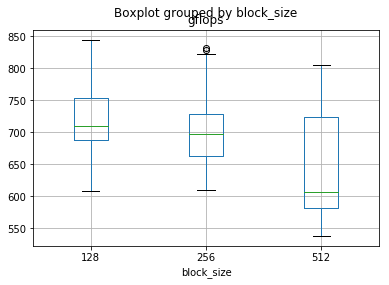

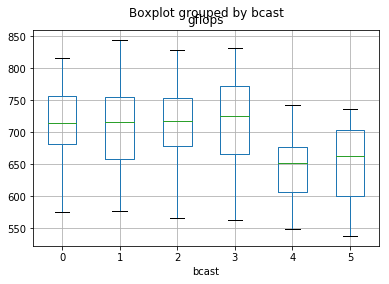

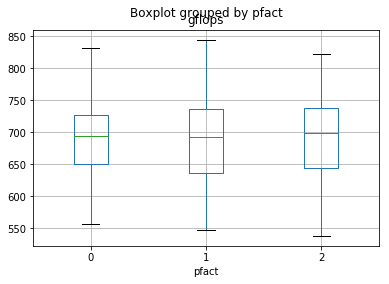

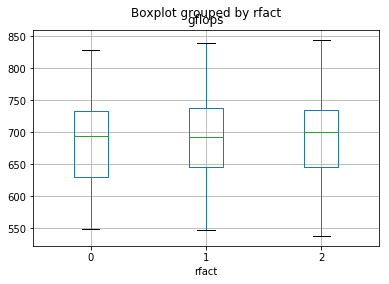

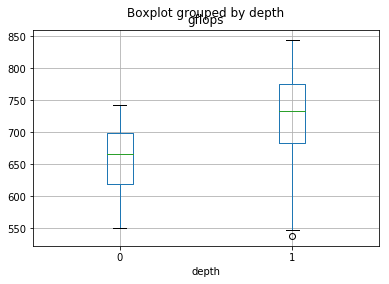

In [17]:
%matplotlib inline
for fact in factors:
    exp.boxplot(by=fact, column='gflops')

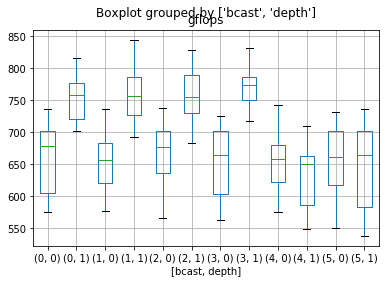

In [18]:
exp.boxplot(by=['bcast', 'depth'], column='gflops')

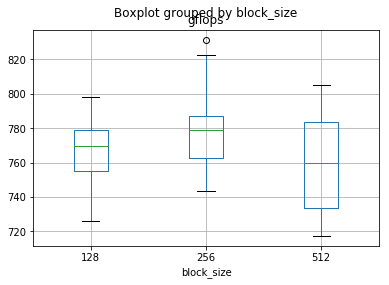

In [19]:
exp[(exp.bcast == 3) & (exp.depth == 1)].boxplot(by='block_size', column='gflops')

## Execution with the best parameters and increasing matrix size

In [23]:
%time run(job, size=2**15, block_size=256, proc_p=2, proc_q=2, bcast=3, pfact=2, rfact=2, depth=1)

[2018-07-19 16:20:26][INFO] [allnodes] put: /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/tmp2lrzkeil → /tmp/hpl-2.2/bin/Debian/HPL.dat
[2018-07-19 16:20:27][INFO] [director | /tmp/hpl-2.2/bin/Debian] mpirun --allow-run-as-root --bind-to none --timestamp-output -np 4 -x OMP_NUM_THREADS=32 -H dahu-31.grenoble.grid5000.fr,dahu-32.grenoble.grid5000.fr,dahu-4.grenoble.grid5000.fr,dahu-5.grenoble.grid5000.fr -x LD_LIBRARY_PATH=/tmp/lib ./xhpl


CPU times: user 557 ms, sys: 113 ms, total: 670 ms
Wall time: 34.2 s


1297.0

In [24]:
%time run(job, size=2**16, block_size=256, proc_p=2, proc_q=2, bcast=3, pfact=2, rfact=2, depth=1)

[2018-07-19 16:21:00][INFO] [allnodes] put: /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/tmpi06jih_t → /tmp/hpl-2.2/bin/Debian/HPL.dat
[2018-07-19 16:21:01][INFO] [director | /tmp/hpl-2.2/bin/Debian] mpirun --allow-run-as-root --bind-to none --timestamp-output -np 4 -x OMP_NUM_THREADS=32 -H dahu-31.grenoble.grid5000.fr,dahu-32.grenoble.grid5000.fr,dahu-4.grenoble.grid5000.fr,dahu-5.grenoble.grid5000.fr -x LD_LIBRARY_PATH=/tmp/lib ./xhpl


CPU times: user 2.51 s, sys: 586 ms, total: 3.09 s
Wall time: 2min 45s


1757.0

In [25]:
%time run(job, size=2**17, block_size=256, proc_p=2, proc_q=2, bcast=3, pfact=2, rfact=2, depth=1)

[2018-07-19 16:23:46][INFO] [allnodes] put: /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/tmpvd3ga4ap → /tmp/hpl-2.2/bin/Debian/HPL.dat
[2018-07-19 16:23:47][INFO] [director | /tmp/hpl-2.2/bin/Debian] mpirun --allow-run-as-root --bind-to none --timestamp-output -np 4 -x OMP_NUM_THREADS=32 -H dahu-31.grenoble.grid5000.fr,dahu-32.grenoble.grid5000.fr,dahu-4.grenoble.grid5000.fr,dahu-5.grenoble.grid5000.fr -x LD_LIBRARY_PATH=/tmp/lib ./xhpl


CPU times: user 13.6 s, sys: 3.44 s, total: 17 s
Wall time: 15min 18s


2207.0

I estimated a peak of about 3400 Gflops, the largest run of HPL reached 2200 Gflops (~65% of the peak). This is not too bad.